In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from catboost import CatBoostClassifier
import lightgbm as lgbm
pd.set_option('display.max_columns', 50)

In [3]:
train = pd.read_csv('onetwotrip_challenge_train.csv')
test = pd.read_csv('onetwotrip_challenge_test.csv')

full = pd.concat([train, test])

In [6]:
[print(i) for i in train.userid[0:4]]

10d654494cbe97bbb25d51ead2600679aff9e097924add09d8066010a0c9adaf
4aafc0391f72bbcf60537aece62923baf9ce644b64ac365a75e021cca794b91b
bac8ffef46348f587c8d17137ab01fb24aef21547c647d2ea68a0214c8abf003
0392247b4b87674aba2c32bf2292b105771a6a376871beba64842a52bd8763b0


[None, None, None, None]

In [16]:
train[0:10]

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,1,0,0,9,5,20,-0.661308,1,4,1,4,1,1,1,1,15,1,1,2,1,0,4,1,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,1,0,0,21,125,3,-0.101043,1,57,1,5,1,6,2,121,15,1,41,3,1,0,2,1,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,1,0,1,7,4,3,-0.661308,1,4,1,2,3,6,2,17,14,1,1,11,7,0,1,1,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,1,0,1,16,4,3,-0.801375,1,100,1,6,1,1,1,17,22,1,1,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0
5,5,bd2f85e3ed0cfa6ce641f632e4cfa35e170336ec5408cb...,0,-0.316223,9,9,1,1,0,1,1,0,0,10,5,62,-0.521242,2,0,1,6,5,6,1,1,17,1,1,1,1,1,3,1,1,0,0,0,0,0,0,0,0,0
6,6,6c6610f18ccd71f5ce664f9a840883d5d4b790d3adb88f...,0,0.071634,10,10,1,1,0,1,1,0,0,7,3,2,0.599289,1,6,1,4,2,3,1,22,5,1,1,1,1,0,4,1,1,1,1,1,0,1,0,0,0,0
7,7,daa23cdeee4840e522def77d76c05e4c9a1b64980d0aaa...,0,-0.238651,10,11,1,1,1,1,1,0,1,10,9,4,0.039024,1,22,1,5,2,6,1,44,21,1,1,7,5,0,4,1,1,1,1,0,0,1,1,0,0,0
8,8,c58f19409e035aafe7fd70b684ccd917402912c10b8a81...,0,-0.005937,8,8,1,1,0,1,1,0,1,14,9,3,-0.241109,2,1,1,1,1,2,1,21,9,2,1,1,1,0,3,1,1,1,0,1,0,1,0,0,0,0
9,9,0f5ac06456131b14993ca38465ea8f1c8867d55c53cb32...,156,1.623061,2,2,3,0,6,2,0,0,1,19,9,92,1.159555,2,2,1,5,2,7,2,46,12,2,18,12,3,0,1,1,1,0,0,0,0,0,0,0,0,0


In [17]:
[train.userid.nunique(), len(train)]

[113902, 196056]

Файлы:
• train.csv - тренировочный датасет (одинаковый для обеих задач);

• test.csv -  тестовый датасет (одинаковый для обеих задач);

• baseline1.ipynb - базовое решение от организаторов;

• sub1.csv  - сабмит бейзлайна;
Колонки в train.csv и test.csv:

• orderid -  id заказа для которого предсказывается вероятность возврата билета;

• userid - id клиента;

• goal1 - возврат билета (бинарная переменная).

In [16]:
cols_to_drop = list(filter(lambda x: 'goal2' in x, df_train.columns))

In [18]:
df_train = df_train.drop(columns=cols_to_drop)

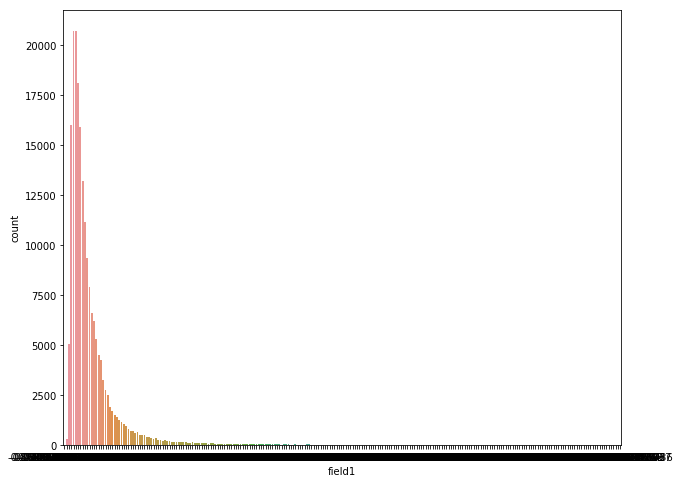

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x="field1", data=df_train)

In [4]:
test.columns

Index(['orderid', 'userid', 'field0', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'field8', 'field9', 'field10', 'field11',
       'field12', 'field13', 'field14', 'field15', 'field16', 'field17',
       'field18', 'field19', 'field20', 'field21', 'field22', 'field23',
       'field24', 'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25'],
      dtype='object')

In [5]:
max_user = train.userid.value_counts().index[0]
max_user

'a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52'

In [14]:
train[train['userid'] == max_user].describe()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.0,363.000000,363.000000,363.000000,363.000000,363.0,363.000000,363.0,363.000000,363.0,363.000000
mean,98292.146006,1.358127,-0.162576,7.000000,7.195592,182.000000,0.002755,0.060606,1.041322,0.988981,0.002755,0.498623,13.779614,9.669421,6.782369,-0.042392,1.198347,4.895317,1.493113,2.953168,2.851240,3.410468,1.484848,16.735537,14.330579,1.181818,1.688705,5.757576,3.123967,0.013774,2.655647,1.0,0.997245,0.520661,0.465565,0.438017,0.0,0.046832,0.0,0.019284,0.0,0.027548
std,59372.609125,2.293062,0.798926,3.112087,3.111693,104.933312,0.052486,0.483617,0.199309,0.104537,0.052486,0.500688,3.265579,11.902264,22.103711,1.074266,0.486614,8.718435,4.836193,1.640479,0.452027,1.728730,0.500460,29.242585,6.068288,0.470100,4.960012,2.296206,0.727179,0.116713,1.029879,0.0,0.052486,0.500262,0.499501,0.496828,0.0,0.211570,0.0,0.137710,0.0,0.163900
min,110.000000,0.000000,-0.781651,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-0.801375,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,48282.000000,0.000000,-0.548937,5.000000,5.000000,91.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,8.000000,2.000000,-0.521242,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,5.000000,3.000000,0.000000,2.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
50%,95867.000000,0.000000,-0.393794,7.000000,7.000000,182.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,14.000000,8.000000,3.000000,-0.381176,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,16.000000,16.000000,1.000000,1.000000,5.000000,3.000000,0.000000,3.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
75%,151528.000000,2.000000,-0.083509,9.000000,10.000000,272.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,16.000000,9.000000,5.000000,0.039024,1.000000,6.000000,1.000000,4.000000,3.000000,5.000000,2.000000,17.000000,20.000000,1.000000,1.000000,5.000000,3.000000,0.000000,3.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
max,195822.000000,16.000000,7.363342,12.000000,12.000000,363.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,23.000000,106.000000,201.000000,9.003273,4.000000,95.000000,53.000000,7.000000,3.000000,7.000000,2.000000,268.000000,23.000000,4.000000,48.000000,18.000000,7.000000,1.000000,4.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000


In [58]:
flight_quantity = dict(train.userid.value_counts())
train['flight_quantity'] = train.userid.apply(lambda x: flight_quantity[x])

In [19]:
train.corr()[['flight_quantity']].sort_values(by='flight_quantity', ascending=False).head()

,flight_quantity
flight_quantity,1.000000
field4,0.857991
field21,0.190120
field27,0.143124
field26,0.132836


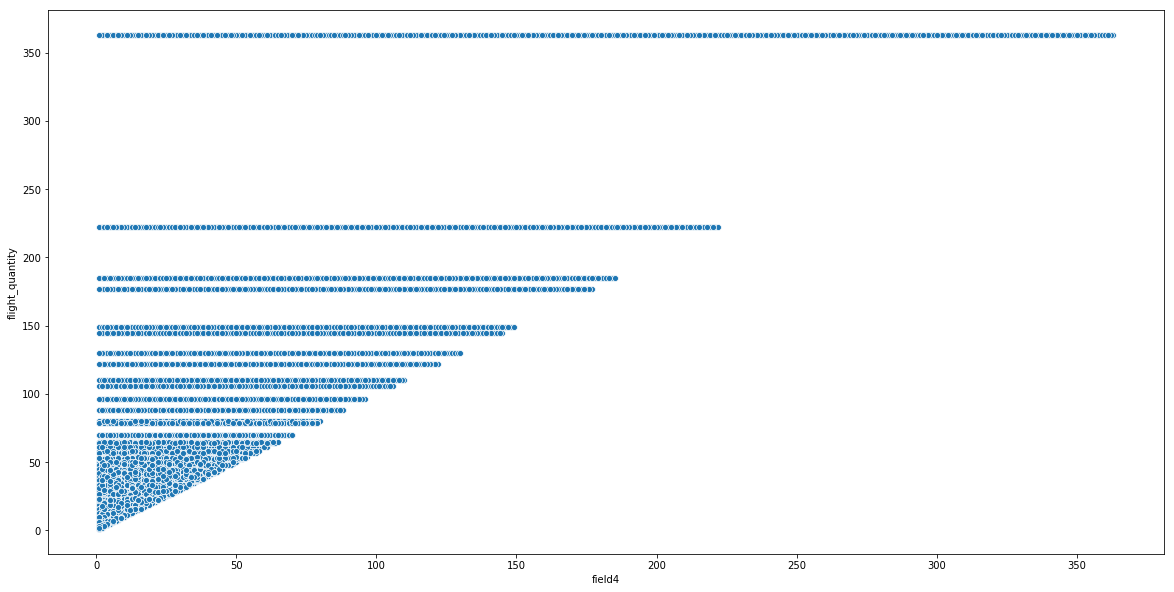

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='field4', y='flight_quantity', data=train)

In [26]:
train[train.userid == max_user].head(10)

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity
110,110,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.393794,10,10,122,0,0,1,1,0,0,14,21,2,-0.241109,1,11,1,3,3,7,1,1,16,1,1,5,3,0,4,1,1,0,1,1,0,0,0,0,0,0,363
601,601,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,5,-0.471365,9,10,101,0,0,1,1,0,1,14,9,3,-0.381176,1,6,1,4,3,3,1,16,6,1,1,5,3,0,3,1,1,1,1,0,0,0,0,0,0,0,363
1225,1225,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.471365,6,6,303,0,0,1,1,0,1,17,4,3,-0.381176,1,6,1,4,3,3,2,16,8,1,1,5,3,0,2,1,1,0,1,1,0,0,0,0,0,0,363
1306,1306,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,2,-0.316223,1,1,193,0,0,1,1,0,1,11,9,2,-0.521242,2,2,1,5,3,7,2,1,11,2,1,5,3,0,1,1,1,1,0,0,0,0,0,0,0,0,363
1494,1494,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,0.537062,4,4,266,0,0,1,1,0,0,15,3,2,0.179090,2,4,1,1,3,5,2,1,20,2,1,5,3,0,2,1,1,0,1,0,0,0,0,0,0,0,363
2378,2378,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,1,-0.471365,6,6,305,0,0,1,1,0,0,8,9,2,-0.381176,1,1,1,3,3,4,2,1,6,1,1,5,3,0,2,1,1,1,0,0,0,0,0,0,0,0,363
2503,2503,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.626508,7,8,54,0,0,1,1,0,0,9,8,2,-0.801375,1,1,1,2,3,3,1,17,20,1,1,5,3,0,3,1,1,1,0,1,0,0,0,0,0,0,363
2539,2539,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,1,-0.471365,11,12,158,0,0,1,1,1,1,15,9,3,-0.381176,2,7,1,3,3,3,1,16,15,1,1,5,3,0,4,1,1,1,1,0,0,0,0,0,0,0,363
4142,4142,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,5,-0.471365,11,11,144,0,0,1,1,0,1,11,9,4,-0.381176,1,2,1,1,3,3,1,16,17,1,1,5,3,0,4,1,1,1,0,0,0,0,0,0,0,0,363
4368,4368,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,1,-0.548937,7,8,53,0,0,1,1,0,0,9,8,5,-0.521242,1,1,1,2,3,3,1,16,8,1,1,5,3,0,3,1,1,1,0,0,0,0,0,0,0,0,363


In [28]:
train[train.userid == max_user].field4.value_counts().unique()

array([1])

# field4 - номер покупки или номер билета каждого userid

# field5

In [29]:
train.field5.value_counts()

1    109049
0     87007
Name: field5, dtype: int64

In [30]:
pd.concat([train.drop(columns='field5').describe(),train.groupby('field5').mean() ])

,orderid,field0,field1,field2,field3,field4,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity
count,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000,196056.000000
mean,98027.500000,28.413163,0.000912,7.980363,7.867864,3.528966,1.577911,1.265292,0.879366,0.023937,0.448117,14.633431,12.010492,27.046028,0.001822,1.517153,15.723854,3.001301,3.811941,2.076172,3.993762,1.226471,38.751938,13.028186,1.404645,4.923456,3.875780,1.746557,0.088572,2.980837,0.994966,0.979649,0.348676,0.645754,0.647687,0.036627,0.168579,0.038713,0.022519,0.015098,0.022142,6.057932
std,56596.636526,69.603944,1.009651,2.757008,3.013659,12.692057,5.614900,0.441489,0.325702,0.164366,0.497302,5.519693,19.579464,55.490962,1.007327,0.952774,25.689926,8.510708,1.931365,0.980940,1.975246,0.418548,71.517212,6.132370,0.784647,11.652149,4.230396,1.376456,0.369773,0.919229,0.070774,0.141199,0.476552,0.478285,0.477692,0.187845,0.374381,0.192912,0.148365,0.121942,0.147144,21.779353
min,0.000000,0.000000,-0.859222,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.941441,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,49013.750000,0.000000,-0.471365,6.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,4.000000,3.000000,-0.521242,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,98027.500000,0.000000,-0.238651,8.000000,8.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,5.000000,4.000000,-0.241109,1.000000,6.000000,1.000000,4.000000,2.000000,4.000000,1.000000,17.000000,13.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,147041.250000,13.000000,0.149205,10.000000,10.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,19.000000,11.000000,26.000000,0.179090,2.000000,18.000000,1.000000,5.000000,3.000000,6.000000,1.000000,42.000000,18.000000,2.000000,1.000000,5.000000,3.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,196055.000000,500.000000,82.142134,12.000000,12.000000,363.000000,323.000000,2.000000,1.000000,4.000000,1.000000,23.000000,273.000000,746.000000,55.225183,18.000000,340.000000,156.000000,7.000000,8.000000,7.000000,2.000000,867.000000,23.000000,18.000000,170.000000,28.000000,7.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,363.000000
0,97971.057697,64.024400,-0.066941,7.078086,7.065569,6.698519,1.171630,1.249486,0.893733,0.022964,0.440263,14.563989,11.751641,27.915949,-0.027443,1.425897,14.143942,3.016481,3.780983,2.158171,3.980565,1.510315,36.845886,13.088223,1.322560,4.323054,5.239935,2.139529,0

обратим внимание на field0 and field4

In [36]:
df5_0 = train[train['field5']==0]
df5_1 = train[train['field5']==1]

In [41]:
df5_1.field0.value_counts()

0    109049
Name: field0, dtype: int64

In [42]:
df5_1.field4.value_counts()

1    109041
2         8
Name: field4, dtype: int64

In [44]:
df5_0.field4.value_counts().head()

2    35745
3    15044
4     7987
1     4861
5     4796
Name: field4, dtype: int64

# field1

In [48]:
train.field1.value_counts().head(7)

-0.548937    20712
-0.471365    20669
-0.393794    18078
-0.626508    16014
-0.316223    15872
-0.238651    13181
-0.161080    11155
Name: field1, dtype: int64

In [50]:
(0.548937 -0.471365 , 0.471365-0.393794)

(0.07757200000000003, 0.077571)

In [56]:
train.field1[:8]/0.077572

0   -8.076472
1   -5.076497
2   -7.076481
3   -3.076514
4   -9.076464
5   -4.076505
6    0.923453
7   -3.076514
Name: field1, dtype: float64

In [58]:
round(train.field1/0.077572+0.076472).head()

0   -8.0
1   -5.0
2   -7.0
3   -3.0
4   -9.0
Name: field1, dtype: float64

к field1 применили стандартизацию  - 0.076472) *0.077572 

In [61]:
train.corr()['field1'].sort_values(ascending=False).head()

field1     1.000000
field14    0.778125
field15    0.412099
field24    0.378573
field6     0.311860
Name: field1, dtype: float64

field1 имеет высокую корреляцию с field14,15,24

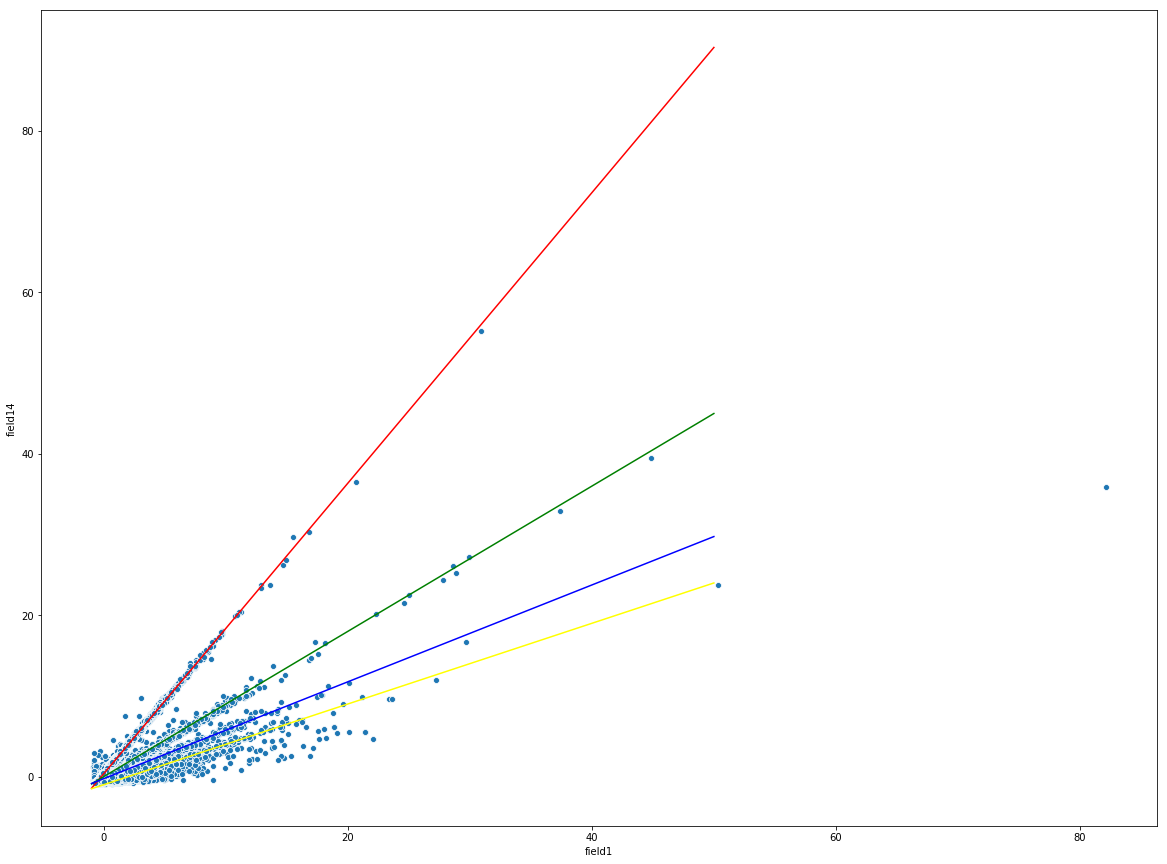

In [76]:
fig, ax = plt.subplots(figsize=(20, 15))
x = np.linspace(-1,50,100)
sns.scatterplot(x='field1', y='field14', data=train)
sns.lineplot(x,1.8*x+0.36, color='red')
sns.lineplot(x,0.9*x, color='green')
sns.lineplot(x,0.5*x-1, color='yellow')
sns.lineplot(x,0.6*x-0.25, color='blue')

Теперь давайте соберем вместе все, что мы сейчас узнали, и попробуем сделать выводы.
Кажется, что все эти признаки означают количество билетов.

field15 - это все билеты. Эти билеты делятся на три категории.

field24 - билеты взрослого человека. Их количество от 1 до 18 (есть три билета с нулем, что может быть шумом).

field28 - билеты ребенка от 2 до 4 лет. В освновном таких билетов нет. Максмум 16. Все логично, всегда должен быть 1 
взрослый. На него уходит 2 билета (если брать максимальный случай).

field9 - билеты ребенка до года. На сайте можно взять максимум 4 таких билета, на каждого из них нужен +1 взрослый. 

Возможно здесь получается такой максимум из-за самой редкости ситуауции, когда покупают билеты на 4 младенцов за раз.

In [78]:
# билеты до года
train.field9.value_counts()

0    191706
1      4018
2       325
4         4
3         3
Name: field9, dtype: int64

In [79]:
train.field4.nunique()

363

In [82]:
train[['userid', 'field4']].groupby('userid').count().sort_values(by='field4', ascending=False).head()

,field4
userid,
a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52,363
98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b,222
a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4,185
6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67,177
13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa,149


In [83]:
(len(train[train['userid']=='a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52']),
len(train[train['userid']=='98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b']))

(363, 222)

In [88]:
np.sort(train[train['userid']=='a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52']['field4'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# есть предположение что field2 - месяц оформления билета

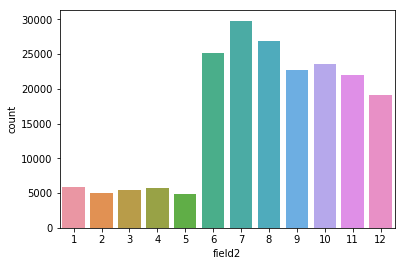

In [89]:
sns.countplot(train['field2'])

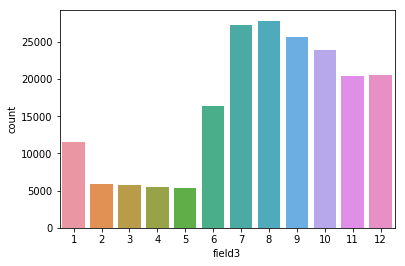

In [90]:
sns.countplot(train['field3'])

In [91]:
train[['field1', 'field15']].corr()

,field1,field15
field1,1.000000,0.412099
field15,0.412099,1.000000


In [97]:
train['field5'].value_counts(), test['field5'].value_counts()

(1    109049
 0     87007
 Name: field5, dtype: int64, 1    253382
 0    201629
 Name: field5, dtype: int64)

In [99]:
train[train['field5']==1]['field4'].value_counts()

1    109041
2         8
Name: field4, dtype: int64

In [101]:
train[train['field5']==0]['field4'].value_counts().head()

2    35745
3    15044
4     7987
1     4861
5     4796
Name: field4, dtype: int64

# field5 - это признак первого заказа. если field5 =1 field4 =1 or 2

In [103]:
test[test['field5']==1]['field4'].value_counts()

1    253368
2        14
Name: field4, dtype: int64

In [104]:
train[(train['field5']==1)&(train['field4']==2)]

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity
8016,8016,dd59455f39e68e25d09e8a8e25be5b16e0bac1861f86ff...,0,0.149205,10,11,2,1,0,1,1,0,0,21,3,26,-0.521242,4,14,1,6,2,6,1,1,20,2,1,1,1,2,4,1,1,0,1,1,0,0,0,0,0,0,2
31918,31918,c6b5fe9dd476bf4432eab271069de46d5e97b0dbc5318c...,0,0.614634,12,12,2,1,8,1,0,0,0,15,3,3,1.439687,1,23,1,3,1,5,1,16,13,1,1,1,1,0,4,1,1,1,1,0,0,1,0,0,0,0,2
43443,43443,98604577816ea8e2f296eb73586c2735f6cfd7581b1546...,0,-0.393794,10,11,2,1,0,1,1,1,0,10,17,57,-0.241109,2,24,1,5,1,1,1,48,8,1,1,3,1,0,4,1,1,0,1,0,0,1,0,0,0,0,4
108286,108286,334f5b5e278e5254cd6f20c5997ee1b899e9cfc7a4c4d6...,0,-0.238651,12,1,2,1,0,1,1,0,0,22,3,3,-0.521242,2,17,1,2,1,5,1,31,19,2,1,7,5,0,4,1,1,0,1,0,0,0,0,0,0,0,2
148491,148491,c9734a44a8c242f60a5030aad68c26510758f64b1ec658...,0,-0.393794,8,2,2,1,0,2,1,0,1,17,4,3,-0.661308,2,199,1,3,1,6,1,288,16,2,3,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0,2
153481,153481,5853e89bfac897e1aeadcec17f1fc3fa42bf366fe1950e...,0,-0.471365,8,8,2,1,0,1,1,0,0,12,5,27,-0.381176,1,4,1,1,1,5,1,1,5,1,1,3,1,0,3,1,1,0,1,1,0,1,0,0,0,0,3
162329,162329,fbb1058b7f1fd7faa3f5429616eea8e9e9e63e3cba79a6...,0,-0.626508,6,7,2,1,0,1,1,0,0,18,5,16,-0.661308,1,31,1,2,1,5,1,1,21,1,1,1,1,0,2,1,1,0,1,1,0,0,0,0,0,0,3
185127,185127,4976325c8feb20cf17ab8e3c2e6d481572eb6affae7e03...,0,-0.161080,8,8,2,1,0,2,1,0,1,18,25,143,0.179090,1,4,44,6,2,3,1,643,21,1,30,12,3,0,3,1,1,1,1,1,0,0,0,0,0,0,5


In [123]:
train[train['userid']=='dd59455f39e68e25d09e8a8e25be5b16e0bac1861f86ff1660ae246fc40ef37b'][['field0','field4','field5']]

,field0,field4,field5
8016,0,2,1
125217,0,1,0


In [124]:
train.iloc[185127].userid

'4976325c8feb20cf17ab8e3c2e6d481572eb6affae7e031f161076187e296c27'

In [125]:
train[train['userid']=='4976325c8feb20cf17ab8e3c2e6d481572eb6affae7e031f161076187e296c27'][['field0','field4','field5']]

,field0,field4,field5
14576,228,3,0
22397,0,5,0
50617,5,4,0
80916,0,1,0
185127,0,2,1


In [135]:
train[['field11','field16','field18', 'field20']].iloc[[185127,80916,22397]]

,field11,field16,field18,field20
185127,18,4,6,3
80916,18,4,6,3
22397,21,25,1,5


# field11

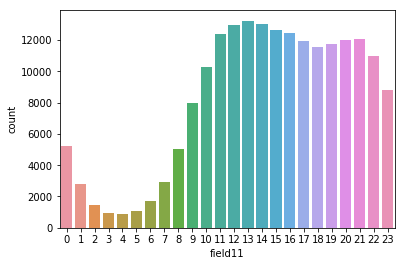

In [126]:
sns.countplot(train['field11'])

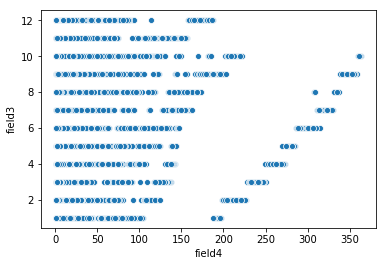

In [137]:
sns.scatterplot(x='field4', y='field3', data=train)

In [145]:
feature_rename = {'field0': 'days_after_previous_order',
                 'field1': 'cost_of_full_order',
                 'field2': 'purchase_month',
                 'field3': 'flight_month',
                 'field4': 'order_count_id',
                 'field5': 'is_first_order',
                 'field11': 'flight_hour',
                 'field15': 'tickets_count',
                 'field16': 'days_before_flight',
                 'field18': 'purchase_day',
                 'field20': 'flight_day',
                 'field20': 'year',
                 'field9': '1year_baby_in_ticket',
                 'field28': '4year_babe_in_ticket',
                 'field24': 'adults_in_tickets'}

In [139]:
train.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,1,0,0,9,5,20,-0.661308,1,4,1,4,1,1,1,1,15,1,1,2,1,0,4,1,1,0,1,1,0,1,0,0,0,0,1
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,1,0,0,21,125,3,-0.101043,1,57,1,5,1,6,2,121,15,1,41,3,1,0,2,1,1,0,1,0,0,0,0,0,0,0,2
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,1,0,1,7,4,3,-0.661308,1,4,1,2,3,6,2,17,14,1,1,11,7,0,1,1,1,0,1,1,0,0,0,0,0,0,2
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0,3
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,1,0,1,16,4,3,-0.801375,1,100,1,6,1,1,1,17,22,1,1,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0,1


In [59]:
train['ticket_avg_price'] = train['field1']/train['field15']

In [147]:
train.corr()[['field6','field7','field8', 'field9', 'field10']]

,field6,field7,field8,field9,field10
orderid,0.001666,0.003361,-0.000129,0.000168,0.000764
field0,0.018127,-0.009932,-0.037316,0.008017,-0.012315
field1,0.311860,0.284017,-0.334327,0.042168,0.021455
field2,0.018259,-0.008249,-0.016634,-0.008913,-0.023834
field3,-0.009480,-0.017647,0.024069,-0.002954,-0.011102
field4,-0.035795,-0.002906,0.028733,-0.010874,-0.009620
field5,0.064633,0.031979,-0.039400,0.005290,0.014106
field6,1.000000,0.133920,-0.452534,0.007753,0.063303
field7,0.133920,1.000000,-0.188553,-0.013215,0.048242
field8,-0.452534,-0.188553,1.000000,0.017925,-0.019385


In [144]:
train.field7.unique()

array([1, 2])

# field23

In [149]:
np.sort(train.field23.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

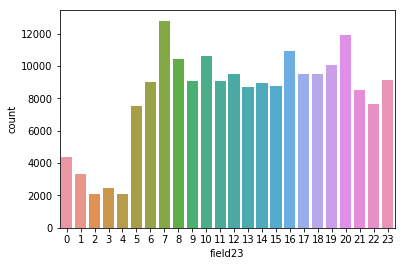

In [150]:
sns.countplot(train.field23)

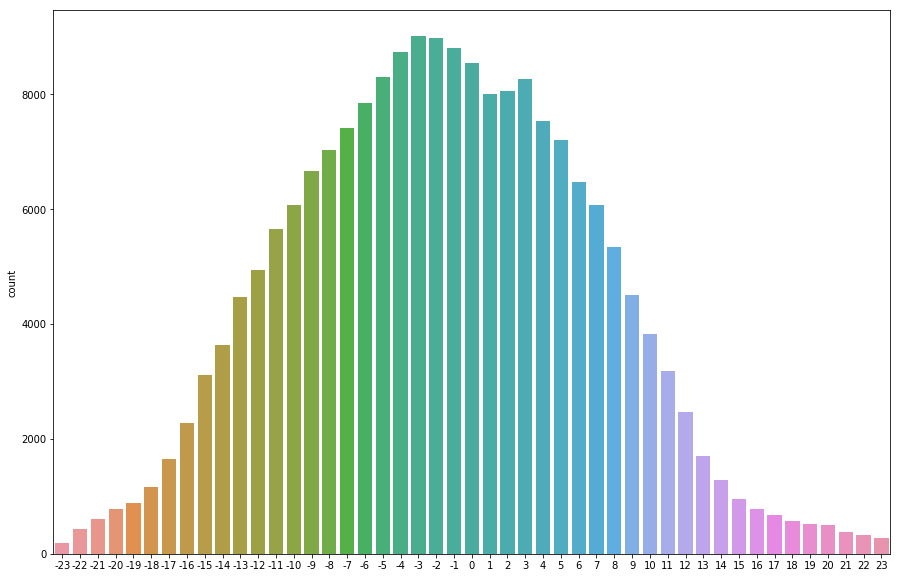

In [155]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(train.field23-train.field11)

In [19]:
today = train[train['field16']==0]

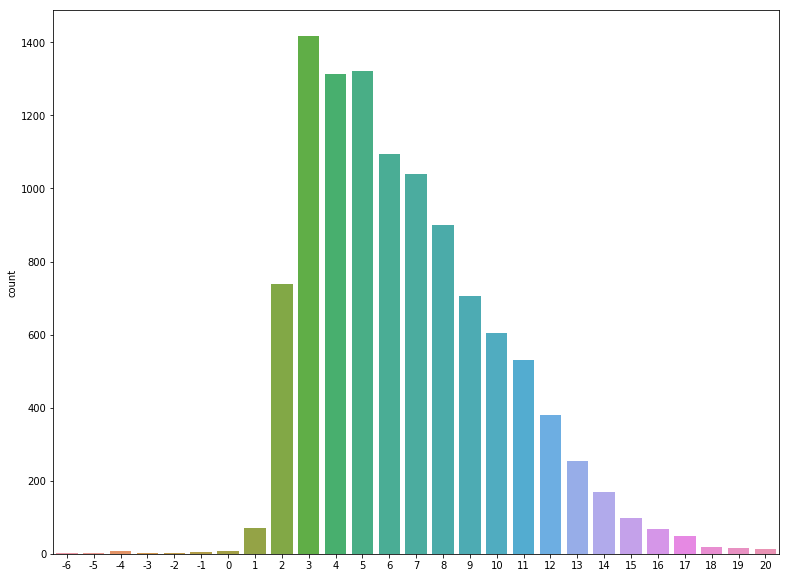

In [158]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.countplot(today.field23-today.field11)

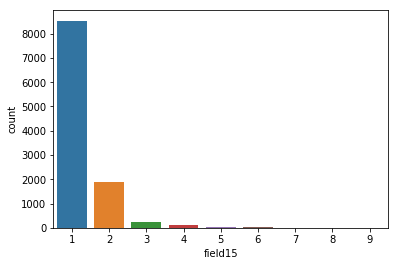

In [161]:
#предполагаю, что в день вылета люди в основном берут 1 или 2 билета
sns.countplot(today.field15)

да, так и есть. хотя и обычно большинство билетов в 1 количестве

In [162]:
train.field15.value_counts()

1     129491
2      48023
3       8387
4       7550
6       1215
5        735
8        390
7         97
10        96
9         32
12        23
14         7
16         6
18         3
13         1
Name: field15, dtype: int64

In [20]:
today.corr()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
orderid,1.000000,0.012201,-0.005399,-0.012506,-0.012506,0.000175,-0.009722,-0.016050,0.010619,-0.002872,0.007283,0.010760,0.000239,0.009008,0.006767,-0.012755,0.005435,NaN,0.005719,0.003333,-0.002387,0.003252,0.011023,0.004280,-0.004383,0.007473,0.009827,-0.003123,-0.009111,-0.007746,-0.007172,-0.005957,0.017077,0.014562,0.000905,-0.007335,-0.002273,0.009096,0.001097,0.003943,-0.006741,-0.003126
field0,0.012201,1.000000,-0.011764,-0.218306,-0.218306,-0.033422,-0.415265,0.005168,-0.009686,-0.018510,0.009279,-0.060472,0.002902,-0.008911,0.003729,-0.008195,0.001568,NaN,-0.004015,-0.002804,0.006026,-0.002851,0.512849,-0.019707,0.002895,-0.003472,-0.020614,0.020696,0.010702,0.010160,-0.208473,-0.007277,0.036534,-0.028080,-0.024102,-0.013835,-0.013872,-0.042466,-0.009434,-0.005587,-0.001710,-0.004363
field1,-0.005399,-0.011764,1.000000,-0.014755,-0.014755,0.029039,0.048952,0.155907,0.297379,-0.178252,0.019986,0.059498,-0.017927,0.236844,0.237663,0.821677,0.393412,NaN,0.248565,0.036588,-0.033990,0.036563,-0.012245,0.199457,-0.024660,0.385297,0.249127,0.052361,0.034488,0.151104,-0.012919,-0.053593,0.032699,0.057673,0.061034,-0.003159,0.062921,0.076999,-0.007828,-0.008452,0.014285,0.034085
field2,-0.012506,-0.218306,-0.014755,1.000000,1.000000,-0.126691,0.317337,0.008938,-0.015942,0.000916,-0.008486,-0.045957,0.005465,0.031344,0.004842,-0.015995,0.004886,NaN,0.016043,0.024816,0.008263,0.024832,-0.673885,0.016493,-0.012661,0.014022,-0.001933,-0.117148,-0.078340,-0.020058,0.959392,0.014225,0.061671,-0.014684,-0.032733,-0.043979,0.033927,0.063753,-0.003012,-0.004717,-0.005517,-0.010374
field3,-0.012506,-0.218306,-0.014755,1.000000,1.000000,-0.126691,0.317337,0.008938,-0.015942,0.000916,-0.008486,-0.045957,0.005465,0.031344,0.004842,-0.015995,0.004886,NaN,0.016043,0.024816,0.008263,0.024832,-0.673885,0.016493,-0.012661,0.014022,-0.001933,-0.117148,-0.078340,-0.020058,0.959392,0.014225,0.061671,-0.014684,-0.032733,-0.043979,0.033927,0.063753,-0.003012,-0.004717,-0.005517,-0.010374
field4,0.000175,-0.033422,0.029039,-0.126691,-0.126691,1.000000,-0.239406,-0.022511,0.013337,0.005759,-0.013333,-0.018594,-0.005897,0.009227,0.008043,0.051694,-0.031449,NaN,-0.004336,-0.017451,-0.004672,-0.017445,0.283039,0.025633,-0.007688,-0.025847,0.042413,0.179384,0.173062,-0.020152,-0.129426,-0.014890,0.020288,-0.035717,-0.037812,-0.044784,-0.027174,-0.074996,-0.004525,-0.003221,0.003062,0.004226
field5,-0.009722,-0.415265,0.048952,0.317337,0.317337,-0.239406,1.000000,0.046357,0.037367,-0.010621,0.014496,-0.001367,0.000109,0.034815,0.017472,0.024480,0.056598,NaN,0.031096,0.015230,-0.006702,0.015278,-0.598068,0.021872,-0.014578,0.058752,0.027643,-0.316358,-0.282571,0.006128,0.302713,0.020151,-0.060122,0.074719,0.074974,0.092125,0.058199,0.163398,0.002312,0.013455,-0.008092,-0.000432
field6,-0.016050,0.005168,0.155907,0.008938,0.008938,-0.022511,0.046357,1.000000,0.037805,-0.276758,0.003537,0.065570,0.004405,0.022818,-0.002291,0.121500,0.129389,NaN,0.010972,-0.006471,-0.017127,-0.006464,-0.017513,0.031835,0.031567,0.137589,0.050211,-0.019747,-0.019490,0.020099,0.005155,-0.003560,0.010843,0.150601,0.275146,0.125064,0.008751,0.019967,0.003893,-0.002016,-0.003492,-0.001627
field7,0.010619,-0.009686,0.297379,-0.015942,-0.015942,0.013337,0.037367,0.037805,1.000000,-0.085005,0.007436,0.079239,-0.007787,0.414504,0.355395,0.337714,0.017309,NaN,0.461268,0.007108,0.013324,0.007015,-0.000811,0.302623,-0.050702,0.018844,0.586623,0.023869,0.001689,-0.002210,-0.015186,-0.090131,0.043130,-0.020303,-0.025210,-0.068822,0.014190,0.011279,-0.010994,-0.006901,0.007494,0.029391
field8,-0.002872,-0.018510,-0.178252,0.000916,

In [21]:
today.field29.value_counts()

4    3968
3    3956
2    1778
1    1123
Name: field29, dtype: int64

In [26]:
today[today['field29']==2].field3.value_counts()

6    1119
4     370
5     289
Name: field3, dtype: int64

In [29]:
train[train['field29']==3].field3.value_counts()

8     25314
9     24801
7     19182
10     7521
11     1105
12      782
1       377
2       116
3        93
4        27
5        22
6        10
Name: field3, dtype: int64

# field10

In [165]:
train.field10.value_counts()

0    108200
1     87856
Name: field10, dtype: int64

In [166]:
train.groupby('field10').mean() 

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity,ticket_avg_price
field10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,97988.548789,29.185573,-0.018607,8.039575,7.898013,3.638993,0.549898,1.257625,1.246100,0.885055,0.032699,14.554409,12.248993,26.640379,0.009862,1.488983,13.813715,2.615434,3.811497,2.066377,4.005527,1.232366,36.548290,13.061396,1.342043,4.01195,3.781895,1.695675,0.114242,2.998041,0.991054,0.994039,0.304723,0.603817,0.675656,0.033891,0.183484,0.033041,0.020702,0.006063,0.023706,6.045943,-0.111682
1,98075.470782,27.461892,0.024951,7.907439,7.830734,3.393462,0.563991,1.972364,1.288927,0.872359,0.013147,14.730753,11.716764,27.545609,-0.008081,1.551846,18.076307,3.476518,3.812489,2.088235,3.979273,1.219211,41.465865,12.987286,1.481743,6.04603,3.991406,1.809222,0.056957,2.959650,0.999784,0.961926,0.402807,0.697403,0.613242,0.039997,0.150223,0.045700,0.024756,0.026225,0.020215,6.072699,-0.093137


# с field10 пока ничего не понятно

# field12

In [178]:
train.field12.nunique()

270

In [30]:
np.sort(train.field12.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [174]:
train.field12.value_counts().head(10)

4     35039
5     24791
8     20603
3     20507
2     17959
9     17107
1      9714
12     6516
21     5529
19     4783
Name: field12, dtype: int64

In [170]:
train.groupby('field12').mean() 

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity,ticket_avg_price
field12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,97358.612312,35.452440,-0.305834,8.148960,7.745831,2.498868,0.532222,1.304612,1.120754,0.958925,0.030677,0.047457,15.167387,16.456660,-0.404059,1.601503,18.137739,1.803480,3.706300,2.063620,4.009677,1.274037,20.920939,12.996500,1.478382,1.924336,3.253552,1.567531,0.092444,3.025427,0.998971,1.000000,0.022133,0.768684,0.992588,0.033354,0.196520,0.000000,0.044163,0.000000,0.029545,4.069076,-0.307811
2,98845.832786,18.078178,-0.067946,7.620135,7.763238,3.103124,0.627875,1.031628,1.402973,0.953338,0.022384,0.932791,14.856228,17.598697,-0.102018,1.566791,13.204243,2.247007,3.829890,2.055014,3.971379,1.153182,28.643132,13.122446,1.439779,4.507935,3.696587,1.686842,0.104627,2.885406,0.998552,0.999944,0.687065,0.677154,0.603040,0.028565,0.183808,0.082132,0.015758,0.003341,0.017596,5.497077,-0.156952
3,98175.955430,27.023553,0.033308,7.928659,7.769640,4.291461,0.543083,1.413859,1.243770,0.893110,0.029210,0.064271,14.317355,24.157751,0.042439,1.516507,14.257132,2.413907,3.799142,2.043644,4.022919,1.233871,32.038572,13.248354,1.411811,3.216950,3.638124,1.768664,0.075486,2.966694,0.997708,1.000000,0.601307,0.630370,0.597650,0.034525,0.185351,0.050763,0.016531,0.005998,0.024431,7.370898,-0.070743
4,97961.030281,32.377008,-0.323303,7.844459,7.840549,3.135906,0.535460,1.141899,1.084877,0.927795,0.021519,0.923200,14.746568,17.179771,-0.484146,1.580011,15.976769,1.467393,3.862696,2.117383,3.954308,1.257370,22.428523,13.697195,1.470647,2.035075,3.721539,1.786381,0.087845,2.926939,0.999001,0.896258,0.056137,0.775650,0.934844,0.037958,0.083792,0.000742,0.035075,0.072633,0.012215,4.997431,-0.329101
5,97935.775080,18.845791,-0.147162,8.046428,8.031060,2.231899,0.640313,1.058610,1.210641,0.920818,0.022306,0.067121,14.665927,15.679803,-0.175785,1.505103,10.089589,1.406357,3.828970,2.071558,4.029123,1.128756,22.892138,12.977492,1.396636,2.701061,3.011657,1.438425,0.086160,3.012787,0.999516,1.000000,0.041305,0.613650,0.773143,0.027631,0.192893,0.000000,0.016700,0.000363,0.022024,3.698197,-0.209945
6,99466.642857,38.347985,0.636371,7.650183,7.571429,12.710623,0.358974,0.518315,2.000000,0.994505,0.034799,0.106227,14.496337,35.824176,1.122871,1.329670,11.014652,3.950549,3.838828,2.203297,3.998168,1.443223,44.827839,13.390110,1.208791,3.897436,5.053114,1.963370,0.086081,2.836996,0.987179,1.000000,0.001832,0.666667,0.569597,0.021978,0.113553,0.000000,0.003663,0.000000,0.029304,21.408425,0.411696
7,95301.629310,30.913793,2.596047,7.060345,7.258621,1.758621,0.637931,10.801724,2.000000,0.551724,0.034483,0.862069,13.620690,189.241379,2.507090,1.594828,24.034483,4.586207,4.025862,1.956897,4.008621,1.206897,278.267241,11.103448,1.482759,11.974138,4.784483,1.991379,0.077586,2.724138,0.922414,1.000000,0.086207,0.327586,0.008621,0.094828,0.206897,0.008621,0.017241,0.000000,0.060345,2.439655,1.322255
8,98003.318303,30.091103,-0.060041,7.998059,7.925739,4.373878,0.533854,1.504053,1.127263,0.818910,0.024220,0.322332,14.738242,23.037082,-0.008531,1.429986,15.194826,1.713197,3.764209,2.044605,3.991652,1.241470,30.186138,12.389701,1.325390,2.217978,3.725768,1.656555,0.080377,2.974712,0.998787,1.000000,0.767315,0.487356,0.747852,0.029365,0.175169,0.089938,0.013008,0.006310,0.011746,7.707130,-0.131269
9,97546.447244,32.756123,0.180267,7.778687,7.643129,6.524756,0.409072,1.983457,1.218098,0.827907,0.026305,0.808441,14.495528,23.546151,0.260565,1.483486,16.818846,2.097913,3.769334,2.135442,4.000818,1.322675,35.312913,12.036827,1.372304,3.998071,6.210089,2.528205,0.084878,2.921669,0.995324,1.000000,0.788391,0.605074,0.079324,0.039516,0.149880,

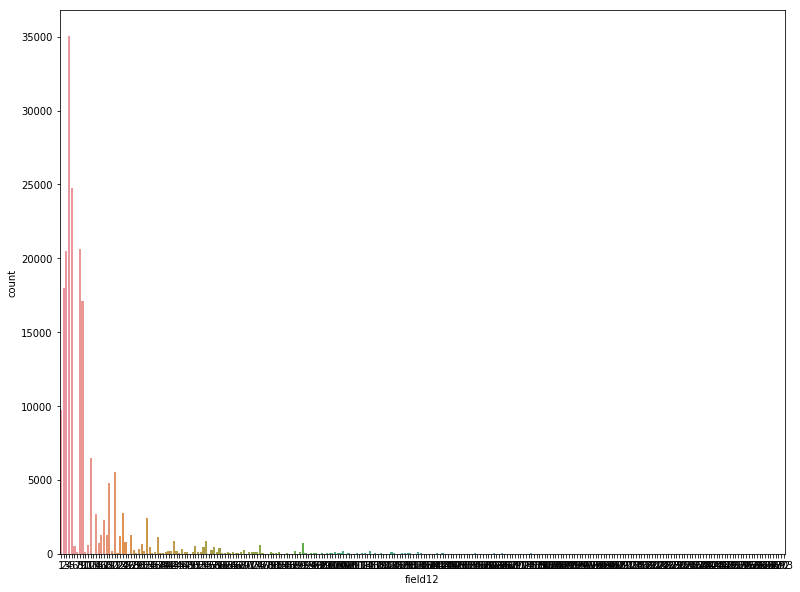

In [175]:
fig, ax = plt.subplots(figsize=(13, 10))

sns.countplot(train.field12)

In [177]:
train[train['userid']==max_user].field12.value_counts()

8      132
9      113
4       34
3       26
5       11
2       11
73       6
12       6
37       5
17       4
1        4
21       3
14       3
106      2
19       2
24       1
Name: field12, dtype: int64

In [53]:
next_max_user = train.userid.value_counts().index[1]
next_max_user

'98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b'

In [186]:
train[train['userid']==next_max_user].field12.value_counts()

9     83
3     81
11    17
36    12
4      9
2      9
12     4
14     3
58     1
46     1
19     1
5      1
Name: field12, dtype: int64

In [187]:
train[['field4', 'flight_quantity']].corr()

,field4,flight_quantity
field4,1.000000,0.857991
flight_quantity,0.857991,1.000000


In [189]:
max(train[train['userid']==next_max_user].field4)

222

# field14

In [191]:
train.field14.nunique()

149

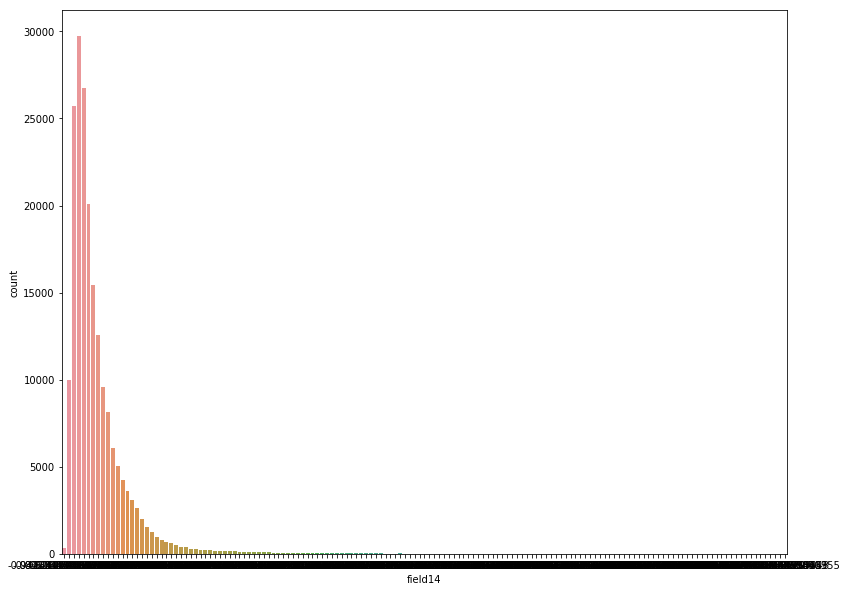

In [193]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.countplot(train.field14)

In [195]:
train.field14.value_counts().head()

-0.521242    29732
-0.381176    26765
-0.661308    25703
-0.241109    20107
-0.101043    15456
Name: field14, dtype: int64

In [46]:
np.sort(np.round(train.field14.unique()/0.14+0.7241))

array([ -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  97.,  98.,  99., 101., 102., 104., 105., 106.,
       107., 108., 109., 110., 111., 112., 113., 115., 116., 117., 119.,
       120., 122., 124., 126., 127., 129., 130., 143., 144., 145., 146.,
       154., 161., 168., 170., 175., 181., 187., 188., 192., 195., 213.,
       217., 236., 257., 261., 283., 395.])

In [41]:
for i in range(train.field14.nunique()-1):
    print(round(np.sort(train.field14.unique())[i]/0.14-np.sort(train.field14.unique())[i+1]/0.14))

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-2.0
-1.0
-1.0
-2.0
-1.0
-2.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-2.0
-1.0
-1.0
-2.0
-1.0
-2.0
-2.0
-2.0
-1.0
-2.0
-1.0
-13.0
-1.0
-1.0
-1.0
-8.0
-7.0
-7.0
-2.0
-5.0
-6.0
-6.0
-1.0
-4.0
-3.0
-18.0
-4.0
-19.0
-21.0
-4.0
-22.0
-112.0


применена стандартизация

In [87]:
train.field1.value_counts()

-0.548937     20712
-0.471365     20669
-0.393794     18078
-0.626508     16014
-0.316223     15872
-0.238651     13181
-0.161080     11155
-0.083509      9344
-0.005937      7886
 0.071634      6615
 0.149205      6183
 0.226777      5307
-0.704079      5060
 0.304348      4496
 0.381920      4228
 0.459491      3251
 0.537062      2727
 0.614634      2512
 0.692205      1915
 0.769776      1681
 0.847348      1508
 0.924919      1375
 1.002490      1247
 1.080062      1164
 1.157633      1051
 1.235205       922
 1.312776       812
 1.390347       703
 1.467919       701
 1.623061       622
              ...  
 22.024329        1
 16.361620        1
 24.584184        1
 13.026051        1
 23.653328        1
 28.850609        1
 44.830309        1
 17.913047        1
 10.543768        1
 15.973763        1
 25.049612        1
 14.655050        1
 17.447619        1
 16.206477        1
 14.732621        1
 18.766332        1
 15.508335        1
 13.956908        1
 16.284049        1


# field13

In [32]:
train.field13.nunique()

698

In [36]:
np.sort(train.field13.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

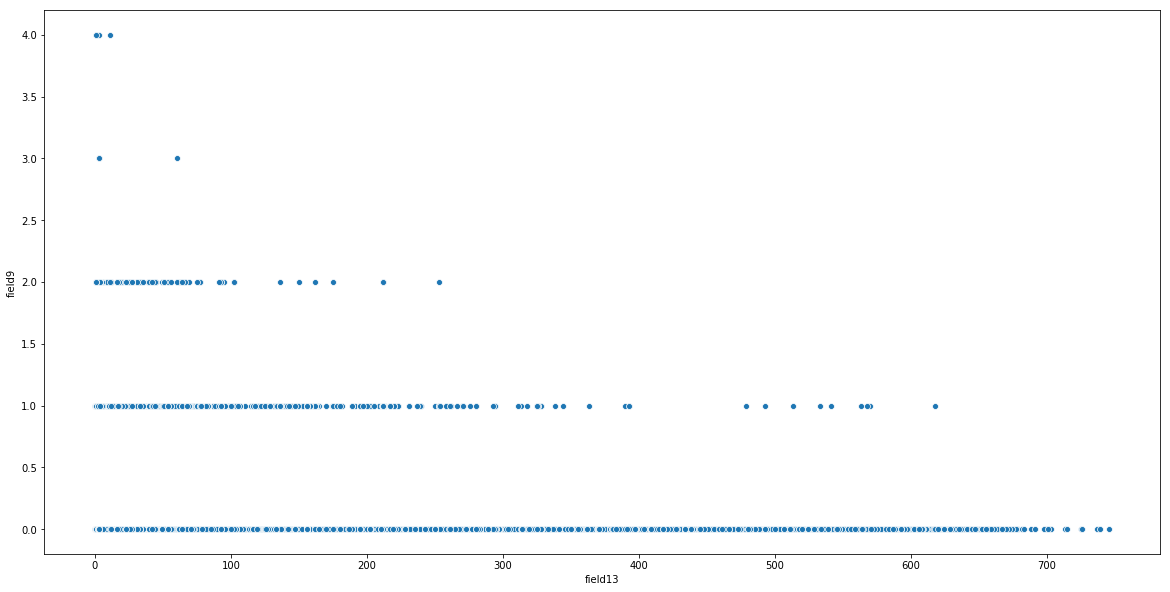

In [100]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='field13', y='field9', data=train)

In [90]:
train[train['userid'] == max_user].field13.value_counts()

2      147
3      101
5       82
4       13
165      3
201      2
75       2
51       2
26       2
6        2
1        2
81       1
31       1
27       1
25       1
24       1
Name: field13, dtype: int64

In [91]:
train[train['userid'] == max_user].groupby('field13').mean()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity,ticket_avg_price
field13,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,21379.000000,0.500000,-0.704079,10.500000,10.500000,135.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,12.000000,1.000000,-0.801375,1.000000,5.000000,1.0,3.000000,3.000000,1.000000,1.000000,16.000000,19.000000,1.000000,1.000000,5.000000,3.000000,0.000000,4.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,363.0,-0.704079
2,95818.523810,1.462585,-0.212266,7.238095,7.367347,182.857143,0.000000,0.013605,1.000000,0.993197,0.000000,0.476190,13.836735,7.564626,-0.168694,1.210884,3.952381,1.0,2.993197,2.843537,3.605442,1.469388,10.095238,16.605442,1.210884,1.000000,5.748299,3.149660,0.000000,2.734694,1.0,0.993197,0.530612,0.401361,0.510204,0.0,0.047619,0.0,0.020408,0.0,0.013605,363.0,-0.277436
3,96225.128713,1.158416,-0.195641,6.782178,6.990099,195.435644,0.000000,0.000000,1.019802,1.000000,0.009901,0.554455,14.237624,8.445545,-0.081628,1.257426,3.524752,1.0,2.782178,2.811881,3.603960,1.554455,17.772277,15.386139,1.247525,1.534653,5.891089,3.148515,0.000000,2.603960,1.0,1.000000,0.485149,0.524752,0.326733,0.0,0.049505,0.0,0.019802,0.0,0.019802,363.0,-0.203640
4,112293.230769,1.461538,-0.107377,7.384615,7.692308,158.846154,0.000000,0.153846,1.000000,0.923077,0.000000,0.384615,12.384615,10.307692,0.222187,1.076923,8.000000,1.0,3.076923,2.846154,3.000000,1.384615,16.538462,15.461538,1.000000,1.000000,6.076923,3.000000,0.076923,2.692308,1.0,1.000000,0.615385,0.769231,0.307692,0.0,0.000000,0.0,0.000000,0.0,0.000000,363.0,-0.116099
5,102390.085366,1.512195,-0.205542,6.560976,6.768293,178.841463,0.012195,0.146341,1.085366,0.975610,0.000000,0.500000,13.426829,12.036585,-0.070297,1.109756,4.841463,1.0,3.085366,2.902439,2.890244,1.500000,25.658537,8.926829,1.085366,2.951220,5.573171,3.097561,0.024390,2.487805,1.0,1.000000,0.548780,0.341463,0.451220,0.0,0.060976,0.0,0.012195,0.0,0.048780,363.0,-0.267202
6,143949.000000,0.500000,0.110420,9.000000,9.000000,94.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,11.500000,6.500000,0.599289,1.000000,5.000000,1.0,2.000000,3.000000,3.500000,1.000000,16.000000,18.000000,1.000000,1.000000,5.000000,3.000000,0.000000,3.500000,1.0,1.000000,0.000000,0.500000,0.500000,0.0,0.000000,0.0,0.000000,0.0,0.000000,363.0,0.110420
24,46981.000000,0.000000,-0.238651,1.000000,2.000000,203.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,16.000000,3.000000,0.039024,1.000000,6.000000,1.0,4.000000,3.000000,3.000000,2.000000,16.000000,15.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,363.0,-0.238651
25,91951.000000,0.000000,0.459491,11.000000,11.000000,132.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,11.000000,9.000000,1.159555,1.000000,4.000000,1.0,4.000000,3.000000,1.000000,1.000000,16.000000,6.000000,1.000000,1.000000,5.000000,3.000000,0.000000,4.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,363.0,0.459491
26,69741.500000,0.500000,0.265563,10.000000,10.000000,255.500000,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,16.000000,6.500000,-0.101043,2.000000,6.000000,1.0,5.000000,3.000000,4.000000,1.500000,16.000000,21.000000,2.000000,1.000000,5.000000,3.000000,0.000000,3.500000,1.0,1.000000,0.500000,1.000000,1.000000,0.0,0.000000,0.0,0.500000,0.0,0.000000,363.0,-0.042744


In [98]:
train[train['field13']==1].describe()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity,ticket_avg_price
count,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.0,6276.000000,6276.000000,6276.000000,6276.0,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000
mean,97106.969407,31.041268,-0.273865,7.987094,7.762110,2.551944,0.549395,1.093850,1.085086,0.930688,0.027565,0.447259,14.946941,4.250478,1.0,-0.383809,1.645475,13.568674,1.0,3.766730,2.070586,4.060070,1.254621,17.929573,13.148343,1.531230,2.240280,3.681326,1.715105,0.086679,2.971957,0.999044,0.966380,0.223709,0.708413,0.832537,0.033620,0.170650,0.029637,0.037444,0.024538,0.020714,4.226577,-0.282369
std,56786.811066,70.256586,0.525335,2.921331,3.208898,4.633880,0.497594,3.221782,0.279032,0.254004,0.189035,0.497250,5.220025,7.117950,0.0,0.516496,1.096331,19.904719,0.0,1.924905,0.971771,1.938182,0.435683,33.818812,5.975393,0.917374,5.798333,4.261841,1.351087,0.384324,0.966784,0.030907,0.180264,0.416763,0.454529,0.373419,0.180264,0.376233,0.169596,0.189863,0.154724,0.142436,9.642831,0.350838
min,163.000000,0.000000,-0.781651,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,-0.941441,1.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.781651
25%,47241.500000,0.000000,-0.548937,6.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,1.000000,1.0,-0.661308,1.000000,2.000000,1.0,2.000000,1.000000,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.548937
50%,97111.000000,0.000000,-0.393794,8.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,4.000000,1.0,-0.521242,1.000000,6.000000,1.0,4.000000,2.000000,4.000000,1.000000,2.000000,14.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-0.316223
75%,146504.750000,22.000000,-0.161080,10.000000,10.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,4.000000,1.0,-0.241109,2.000000,17.000000,1.0,5.000000,3.000000,6.000000,2.000000,20.000000,19.000000,2.000000,1.000000,5.000000,3.000000,0.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-0.083509
max,195924.000000,469.000000,6.820343,12.000000,12.000000,151.000000,1.000000,90.000000,2.000000,1.000000,4.000000,1.000000,23.000000,231.000000,1.0,12.364866,14.000000,339.000000,1.0,7.000000,6.000000,7.000000,2.000000,525.000000,23.000000,14.000000,122.000000,26.000000,7.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,363.000000,6.587628


In [99]:
train[['field13', 'field12']].corr()

,field13,field12
field13,1.000000,0.395022
field12,0.395022,1.000000


# field17

In [50]:
train.field17.nunique()

155

In [52]:
train[train['userid'] == max_user].field17.value_counts()

1     357
53      3
2       2
22      1
Name: field17, dtype: int64

In [54]:
train[train['userid'] == next_max_user].field17.value_counts()

1     192
36     15
4      11
60      2
9       2
Name: field17, dtype: int64

In [56]:
train[train['userid'] == max_user].groupby('field17').mean()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
field17,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,97619.624650,1.364146,-0.190196,7.002801,7.182073,183.557423,0.002801,0.047619,1.02521,0.988796,0.002801,0.492997,13.781513,8.893557,4.156863,-0.090057,1.198880,4.330532,2.946779,2.851541,3.392157,1.490196,16.319328,14.324930,1.184874,1.59944,5.750700,3.12605,0.011204,2.655462,1.0,0.997199,0.518207,0.456583,0.445378,0.0,0.047619,0.0,0.019608,0.0,0.022409
2,126588.000000,0.000000,2.786632,8.000000,11.000000,70.500000,0.000000,2.000000,2.00000,1.000000,0.000000,1.000000,15.000000,37.000000,201.000000,5.501613,1.000000,94.000000,2.000000,3.000000,5.000000,1.000000,17.000000,18.000000,1.000000,1.00000,5.000000,3.00000,0.000000,3.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000
22,114926.000000,1.000000,0.769776,8.000000,9.000000,84.000000,0.000000,0.000000,2.00000,1.000000,0.000000,0.000000,10.000000,106.000000,81.000000,1.859887,1.000000,21.000000,3.000000,3.000000,3.000000,1.000000,180.000000,14.000000,1.000000,37.00000,5.000000,3.00000,0.000000,3.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
53,153913.666667,1.666667,0.847348,5.666667,5.666667,103.666667,0.000000,0.333333,2.00000,1.000000,0.000000,1.000000,14.000000,51.666667,165.000000,1.299621,1.333333,7.333333,4.333333,2.666667,4.666667,1.333333,11.666667,12.666667,1.000000,1.00000,7.333333,3.00000,0.333333,2.333333,1.0,1.000000,0.333333,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [57]:
train[train['userid'] == next_max_user].groupby('field17').mean()

,orderid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
field17,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,97862.46875,1.770833,0.736243,6.520833,6.630208,113.145833,0.005208,0.046875,1.182292,0.994792,0.0,0.296875,16.265625,6.755208,12.567708,0.960398,1.385417,3.953125,3.515625,1.072917,3.968750,1.932292,26.890625,13.296875,1.385417,6.994792,1.723958,1.333333,0.0,2.515625,1.0,0.994792,0.770833,0.343750,0.380208,0.005208,0.0,0.0,0.0,0.0,0.067708
4,115942.00000,1.363636,0.276140,9.090909,9.090909,131.727273,0.000000,0.000000,2.000000,1.000000,0.0,0.727273,17.727273,10.090909,96.000000,0.917622,1.000000,2.363636,3.000000,1.000000,4.090909,1.727273,1.727273,11.818182,1.000000,1.000000,1.727273,1.000000,0.0,3.272727,1.0,1.000000,0.181818,0.545455,0.636364,0.000000,0.0,0.0,0.0,0.0,0.090909
9,133115.00000,5.500000,1.661847,7.000000,7.000000,129.000000,0.000000,0.000000,2.000000,1.000000,0.0,0.000000,15.500000,9.000000,69.500000,2.280086,1.500000,1.500000,4.000000,1.000000,2.000000,2.000000,1.000000,14.000000,1.500000,1.000000,1.000000,1.000000,0.0,2.500000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.500000
36,125001.00000,0.666667,3.614060,4.266667,4.600000,70.066667,0.000000,0.000000,2.000000,1.000000,0.0,0.133333,16.266667,23.400000,119.000000,2.728298,2.066667,13.933333,2.800000,1.000000,4.133333,2.000000,2.266667,15.800000,2.066667,1.000000,1.000000,1.000000,0.0,1.800000,1.0,1.000000,1.000000,1.000000,0.133333,0.000000,0.0,0.0,0.0,0.0,0.066667
60,17562.00000,0.000000,3.058132,6.500000,7.000000,135.500000,0.000000,0.500000,2.000000,1.000000,0.0,0.000000,19.000000,52.000000,200.000000,2.560219,2.000000,3.500000,2.000000,1.000000,2.000000,2.000000,1.000000,14.000000,2.000000,1.000000,1.000000,1.000000,0.0,2.500000,1.0,1.000000,0.500000,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [64]:
cat_features = ['field2', 'field3', 'field18', 'field20', 'field10', 'field29']

In [79]:
use_featues = ['field2','field4', 'field3', 'field18', 'field20', 'field21', 'field10',
              'field1', 'field11', 'field15', 'field9', 'field24', 'field23', 'field14','field12', 'field6',
              'field7', 'field8', 'field22', 'field17', 'field19', 'field29']

In [65]:
clf = CatBoostClassifier(logging_level='Silent', random_state=0)

In [67]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

In [68]:
ttrain, tvalidation = train_test_split(train, test_size=0.20)

In [123]:
clf.grid_search(grid, train[use_featues], train['goal1'])

0:	loss: 0.1036287	best: 0.1036287 (0)	total: 52.2s	remaining: 25m 13s
1:	loss: 0.1036783	best: 0.1036287 (0)	total: 1m 41s	remaining: 23m 40s
2:	loss: 0.1036192	best: 0.1036192 (2)	total: 2m 32s	remaining: 22m 55s
3:	loss: 0.1035431	best: 0.1035431 (3)	total: 3m 22s	remaining: 21m 58s
4:	loss: 0.1036700	best: 0.1035431 (3)	total: 4m 14s	remaining: 21m 13s
5:	loss: 0.1036895	best: 0.1035431 (3)	total: 5m 3s	remaining: 20m 15s
6:	loss: 0.1036063	best: 0.1035431 (3)	total: 5m 53s	remaining: 19m 20s
7:	loss: 0.1035318	best: 0.1035318 (7)	total: 6m 43s	remaining: 18m 28s
8:	loss: 0.1036244	best: 0.1035318 (7)	total: 7m 35s	remaining: 17m 41s
9:	loss: 0.1035547	best: 0.1035318 (7)	total: 8m 30s	remaining: 17m 1s
10:	loss: 0.1035475	best: 0.1035318 (7)	total: 9m 34s	remaining: 16m 32s
11:	loss: 0.1038064	best: 0.1035318 (7)	total: 10m 54s	remaining: 16m 21s
12:	loss: 0.1034295	best: 0.1034295 (12)	total: 11m 58s	remaining: 15m 39s
13:	loss: 0.1037353	best: 0.1034295 (12)	total: 13m 2s	remain

KeyboardInterrupt: 

In [145]:
from operator import itemgetter

In [149]:
sorted(list(zip(clf.feature_names_, clf.feature_importances_)), key=itemgetter(1), reverse=True)

[('field12', 15.232667635962796),
 ('field3', 8.347543520846893),
 ('field22', 8.343574321508331),
 ('field11', 7.382118853220534),
 ('field1', 7.001819046645316),
 ('field2', 6.716687335640757),
 ('field14', 6.546144047206551),
 ('field23', 6.220230117005916),
 ('field6', 5.5072002750009785),
 ('field4', 3.557691342882581),
 ('field19', 3.4762934370325436),
 ('field17', 3.1755727746835323),
 ('field18', 2.989806396782612),
 ('field20', 2.7142144528162233),
 ('field29', 2.3875651070450052),
 ('field21', 2.1091919073179795),
 ('field10', 2.0158262522423653),
 ('field24', 1.6736793396996525),
 ('field7', 1.4445760816439979),
 ('field15', 1.350281400041312),
 ('field8', 1.1479307714097553),
 ('field9', 0.6593855833643106)]

In [138]:
clf.feature_importances_

array([ 6.71668734,  3.55769134,  8.34754352,  2.9898064 ,  2.71421445,
        2.10919191,  2.01582625,  7.00181905,  7.38211885,  1.3502814 ,
        0.65938558,  1.67367934,  6.22023012,  6.54614405, 15.23266764,
        5.50720028,  1.44457608,  1.14793077,  8.34357432,  3.17557277,
        3.47629344,  2.38756511])

In [128]:
(len(use_featues), len(clf.feature_importances_))

(22, 22)

In [70]:
result = clf.predict_proba(tvalidation[feat])

In [1]:
roc_auc_score(tvalidation['goal1'], result.argmax(axis=1))

NameError: name 'roc_auc_score' is not defined

In [82]:
proba = clf.predict_proba(test[use_featues])

In [83]:
pd.DataFrame(proba[:, 1], columns=['proba'], index=test['orderid']).to_csv('sub1.csv')

In [63]:
feat = list(filter(lambda x: 'field' in x, train.columns))

In [12]:
def columnsmultiply(df):
    cols = df.columns
    for col in range(len(cols)):
        for intern in range(col,len(cols)):
            df[cols[col]+'_'+ cols[intern]] = df[cols[col]]*df[cols[intern]]
    return df

In [60]:
train.columns

Index(['orderid', 'userid', 'field0', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'field8', 'field9', 'field10', 'field11',
       'field12', 'field13', 'field14', 'field15', 'field16', 'field17',
       'field18', 'field19', 'field20', 'field21', 'field22', 'field23',
       'field24', 'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25', 'goal21', 'goal22', 'goal23',
       'goal24', 'goal25', 'goal1', 'flight_quantity', 'ticket_avg_price'],
      dtype='object')

In [ ]:
columnsmultiply(train).head()

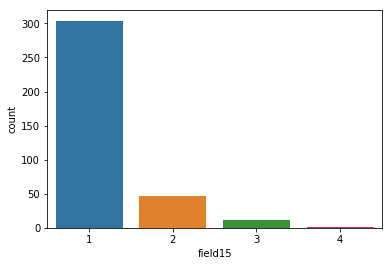

In [6]:
sns.countplot(train[train['userid'] == max_user].field15)

In [7]:
train[train['userid'] == max_user].field15.value_counts()

1    304
2     47
3     11
4      1
Name: field15, dtype: int64

In [13]:
second_max_user = train.userid.value_counts().index[1]
train[train['userid'] == second_max_user].field15.value_counts()

1    156
2     44
3     17
4      5
Name: field15, dtype: int64

In [14]:
(len(train), len(test))

(196056, 455011)

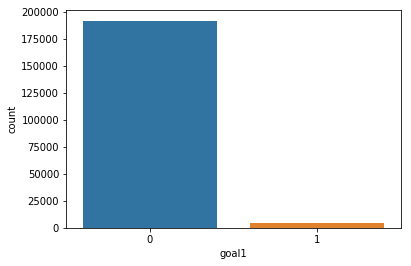

In [15]:
sns.countplot(train.goal1)

In [86]:
clf.get_feature_importance

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x1a28550b70>>

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier()

In [102]:
clf2.fit(train[use_featues], train['goal1'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [103]:
proba1 = clf2.predict_proba(test[use_featues])

In [104]:
result = (proba+proba1)/2

In [105]:
pd.DataFrame(result[:, 1], columns=['proba'], index=test['orderid']).to_csv('sub_cat_gradboost.csv')

In [106]:
result[:,1]

array([0.01223686, 0.01086581, 0.03585575, ..., 0.02384858, 0.03159288,
       0.01228718])

In [116]:
compare = pd.concat([train[['goal1']],pd.DataFrame(result[:,1])], axis=1)

In [117]:
compare[compare[0]>0.5]

,goal1,0
10630,0.0,0.631238
63179,0.0,0.542133
82239,0.0,0.507738
99194,0.0,0.517217
103731,0.0,0.635129
121850,0.0,0.524993
138799,0.0,0.605082
188213,0.0,0.511032
197578,NaN,0.509490
234985,NaN,0.512039


In [120]:
train[train.index == 10630]

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,flight_quantity,ticket_avg_price
10630,10630,47ddc3f6b973c80b8789fff687f7db5c8803669e0c4d1c...,0,-0.626508,9,9,1,1,0,1,1,0,1,14,4,4,-0.801375,1,3,1,3,3,6,1,1,22,1,1,2,1,0,3,1,1,0,1,1,0,0,0,0,0,0,4,-0.626508


In [121]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}